HW3 Anna Misakyan

Data Preprocessing

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install lifelines
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter

In [3]:
# read the data
file_path = r'C:\Users\ASUS\OneDrive\Desktop\Classes\Senior Fall\marketing\HW3\telco.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [5]:
# change the index to ID
df.set_index('ID', inplace=True)

In [6]:
df.head()

,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
ID,,,,,,,,,,,,,,
1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [7]:
# dummification of the variables region, marital, ed, retire, gender, voice, internet, forward, custcat
encode_cols = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat'] 
df_clean = pd.get_dummies(df, columns=encode_cols, prefix=encode_cols, drop_first=True)

# replacing the 0's og the tenure variable with a very small number
df_clean["tenure"] = np.where(df_clean["tenure"] == 0, 0.000001, df_clean["tenure"])

# in the churn variable, replacing the values with 1's and 0's
df_clean['churn'] = pd.Series(np.where(df.churn.values == "Yes", 1, 0), df.index)

In [8]:
df_clean.head()

,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
ID,,,,,,,,,,,,,,,,,,,,
1,13.0,44,9,64,1,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,11.0,33,7,136,1,False,True,False,False,False,True,False,False,True,True,False,True,False,False,True
3,68.0,52,24,116,0,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
4,33.0,33,12,33,1,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
5,23.0,30,9,30,0,True,False,False,True,False,False,False,False,True,False,False,True,False,True,False


Parametric Models

In [9]:
# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()

The AIC value for Weibull is 3216.8611706815464
The AIC value for Exponential is 3215.9608134637247
The AIC value for LogNormal is 3209.0351474316735
The AIC value for LogLogistic is 3214.4154757933375


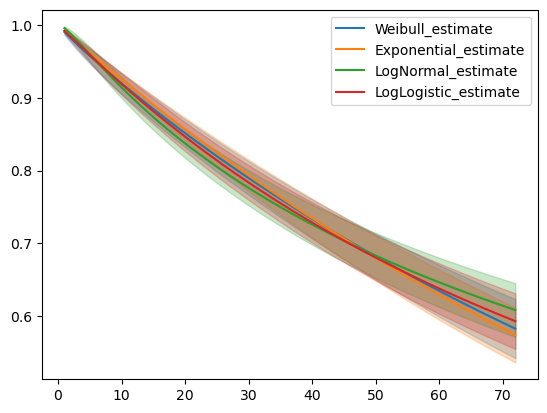

In [10]:
# Fit models and print AIC
models = {"Weibull": wb, "Exponential": ex, "LogNormal": log, "LogLogistic": loglogis}
for model_name, model in models.items():
    model.fit(durations=df_clean["tenure"], event_observed=df_clean["churn"])
    print(f"The AIC value for {model_name} is {model.AIC_}")
    model.plot_survival_function()

AIC is the lowest for the LogNormal model, which suggests that LogNormal should be used for further research, and for CLV prediction.

In [11]:
from lifelines import LogNormalAFTFitter

In [12]:
lognormal_aft = LogNormalAFTFitter()
lognormal_aft.fit(df_clean, duration_col='tenure', event_col='churn')
lognormal_aft.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.012
         time fit was run = 2023-11-29 05:54:48 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                          0.043      1.043      0.009            0.025            0.060                1.025                1.062
       age                              0.033      1.033      0.007            0.018            0.047                1.019                1.048
       custcat_E-service                1.066      2.905      0.171            0.732            1.401                2.080                4.058
       custcat_Plus service             0.925      2.522      0.216            0.502            1.348                1.652                3.849
       custcat_Total service            1.199      3.316      0.250            0.708            1.689                2.029                5.417
       ed_Did not complete high school  0.374      1.453      0.202           -0.021            0.769                0.979                2.157
       ed_High school degree            0.316      1.372      0.163           -0.004            0.636                0.996                1.888
       ed_Post-undergraduate degree    -0.034      0.966      0.223           -0.472            0.403                0.624                1.496
       ed_Some college                  0.272      1.313      0.165           -0.052            0.596                0.950                1.816
       forward_Yes                     -0.198      0.820      0.180           -0.551            0.155                0.576                1.167
       gender_Male                      0.052      1.053      0.114           -0.172            0.276                0.842                1.318
       income                           0.001      1.001      0.001           -0.000            0.003                1.000                1.003
       internet_Yes                    -0.771      0.462      0.143           -1.053           -0.490                0.349                0.612
       marital_Unmarried               -0.455      0.634      0.115           -0.681           -0.229                0.506                0.795
       region_Zone 2                   -0.097      0.907      0.143           -0.377            0.183                0.686                1.201
       region_Zone 3                    0.048      1.049      0.142           -0.229            0.326                0.795                1.385
       retire_Yes                       0.023      1.023      0.444           -0.848            0.893                0.428                2.442
       voice_Yes                       -0.434      0.648      0.169           -0.765           -0.103                0.465                0.902
       Intercept                        2.362     10.615      0.293            1.789            2.936                5.982               18.837
sigma_ Intercept                        0.276      1.318      0.046            0.186            0.366                1.204                1.442

                                         cmp to      z       p   -log2(p)
param  covariate                                                         
mu_    address                            0.000  4.778 <0.0005     19.105
       age                                0.000  4.504 <0.0005     17.193
       custcat_E-service                  0.000  6.253 <0.0005     31.213
       custcat_Plus service               0.000  4.287 <0.0005     15.753
       custcat_Total service              0.000  4.78

Above, we can see which features are significant based on their p values. The features that have p values less than 0.05 are significant. There is no reason to keep features that are not significant in the model, so I will only keep the significant ones.

In [13]:
# keeping only the significant cariables
df_clean = df_clean[["tenure", "churn", "address", "age", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "internet_Yes", "marital_Unmarried", "voice_Yes"]]

In [14]:
#keeping the final model
lognormal_aft = LogNormalAFTFitter()
lognormal_aft.fit(df_clean, duration_col='tenure', event_col='churn')
lognormal_aft.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.100
         time fit was run = 2023-11-29 05:54:55 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                0.043      1.044      0.009            0.025            0.060                1.026                1.062
       age                    0.037      1.038      0.006            0.024            0.049                1.025                1.051
       custcat_E-service      1.026      2.789      0.169            0.694            1.357                2.003                3.885
       custcat_Plus service   0.823      2.276      0.169            0.490            1.155                1.633                3.173
       custcat_Total service  1.013      2.755      0.210            0.603            1.424                1.827                4.154
       internet_Yes          -0.841      0.431      0.138           -1.112           -0.570                0.329                0.566
       marital_Unmarried     -0.447      0.639      0.114           -0.672           -0.223                0.511                0.800
       voice_Yes             -0.463      0.629      0.167           -0.790           -0.137                0.454                0.872
       Intercept              2.535     12.615      0.243            2.059            3.010                7.841               20.295
sigma_ Intercept              0.283      1.327      0.046            0.193            0.373                1.213                1.452

                               cmp to      z       p   -log2(p)
param  covariate                                               
mu_    address                  0.000  4.840 <0.0005     19.557
       age                      0.000  5.754 <0.0005     26.777
       custcat_E-service        0.000  6.068 <0.0005     29.527
       custcat_Plus service     0.000  4.855 <0.0005     19.664
       custcat_Total service    0.000  4.835 <0.0005     19.517
       internet_Yes             0.000 -6.079 <0.0005     29.626
       marital_Unmarried        0.000 -3.908 <0.0005     13.389
       voice_Yes                0.000 -2.779   0.005      7.520
       Intercept                0.000 10.448 <0.0005     82.472
sigma_ Intercept                0.000  6.150 <0.0005     30.268
---
Concordance = 0.781
AIC = 2944.201
log-likelihood ratio test = 280.834 on 8 df
-log2(p) of ll-ratio test = 183.733

CLV

In [15]:
clv = lognormal_aft.predict_survival_function(df_clean)
clv

ID,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
1.0,0.999688,0.999736,0.999999,0.997985,0.999870,0.999934,0.996781,0.993548,0.999994,0.999997,...,0.999828,0.999961,0.999668,1.000000,0.999781,0.996036,0.995073,0.999991,0.999923,0.999471
2.0,0.998129,0.998378,0.999988,0.990703,0.999127,0.999519,0.986180,0.975242,0.999946,0.999965,...,0.998883,0.999699,0.998022,0.999998,0.998622,0.983532,0.980236,0.999915,0.999446,0.997040
3.0,0.995250,0.995831,0.999956,0.979723,0.997635,0.998631,0.971075,0.951403,0.999818,0.999879,...,0.997036,0.999113,0.995004,0.999992,0.996407,0.966176,0.960211,0.999724,0.998443,0.992790
4.0,0.991268,0.992267,0.999893,0.966472,0.995448,0.997273,0.953528,0.925327,0.999593,0.999724,...,0.994377,0.998186,0.990846,0.999979,0.993269,0.946364,0.937776,0.999396,0.996923,0.987122
5.0,0.986400,0.987874,0.999796,0.951860,0.992655,0.995483,0.934724,0.898616,0.999264,0.999491,...,0.991029,0.996934,0.985782,0.999957,0.989366,0.925411,0.914381,0.998926,0.994934,0.980384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,0.595597,0.612735,0.941530,0.380751,0.681995,0.740246,0.324647,0.244165,0.887519,0.906396,...,0.655478,0.780519,0.588828,0.975035,0.631761,0.300058,0.274774,0.864845,0.727282,0.537869
69.0,0.591329,0.608517,0.940235,0.376567,0.678061,0.736667,0.320700,0.240726,0.885403,0.904544,...,0.651418,0.777252,0.584544,0.974386,0.627607,0.296244,0.271117,0.862440,0.723614,0.533498
70.0,0.587113,0.604347,0.938937,0.372457,0.674164,0.733115,0.316829,0.237363,0.883290,0.902692,...,0.647400,0.774006,0.580311,0.973732,0.623498,0.292507,0.267537,0.860042,0.719976,0.529186
71.0,0.582946,0.600224,0.937635,0.368420,0.670304,0.729590,0.313033,0.234073,0.881180,0.900841,...,0.643423,0.770779,0.576130,0.973074,0.619433,0.288845,0.264031,0.857649,0.716367,0.524932


In [16]:
# keep 1 year
clv_year = clv.loc[:, 1:12]
clv_year

ID,1,2,3,4,5,6,7,8,9,10,11,12
1.0,0.999688,0.999736,0.999999,0.997985,0.999870,0.999934,0.996781,0.993548,0.999994,0.999997,0.985297,0.999455
2.0,0.998129,0.998378,0.999988,0.990703,0.999127,0.999519,0.986180,0.975242,0.999946,0.999965,0.951110,0.996967
3.0,0.995250,0.995831,0.999956,0.979723,0.997635,0.998631,0.971075,0.951403,0.999818,0.999879,0.911524,0.992629
4.0,0.991268,0.992267,0.999893,0.966472,0.995448,0.997273,0.953528,0.925327,0.999593,0.999724,0.871484,0.986854
5.0,0.986400,0.987874,0.999796,0.951860,0.992655,0.995483,0.934724,0.898616,0.999264,0.999491,0.832801,0.980000
...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,0.595597,0.612735,0.941530,0.380751,0.681995,0.740246,0.324647,0.244165,0.887519,0.906396,0.158322,0.534692
69.0,0.591329,0.608517,0.940235,0.376567,0.678061,0.736667,0.320700,0.240726,0.885403,0.904544,0.155679,0.530318
70.0,0.587113,0.604347,0.938937,0.372457,0.674164,0.733115,0.316829,0.237363,0.883290,0.902692,0.153102,0.526004
71.0,0.582946,0.600224,0.937635,0.368420,0.670304,0.729590,0.313033,0.234073,0.881180,0.900841,0.150589,0.521748


In [17]:
MM = 200
r = 12
for col in range(1, len(clv_year.columns)+1):
    for row in range(1, 73):
        clv_year[col][row] = clv_year[col][row] / (1 + r / 12)**(row - 1)
df_clean['CLV'] = MM * clv_year.sum(axis = 0)
df_clean.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10472\3807989992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clv_year[col][row] = clv_year[col][row] / (1 + r / 12)**(row - 1)


,tenure,churn,address,age,custcat_E-service,custcat_Plus service,custcat_Total service,internet_Yes,marital_Unmarried,voice_Yes,CLV
ID,,,,,,,,,,,
1,13.0,1,9,44,False,False,False,False,False,False,398.804300
2,11.0,1,7,33,False,False,True,False,False,True,398.942528
3,68.0,0,24,52,False,True,False,False,False,False,399.984172
4,33.0,1,12,33,False,False,False,False,True,False,395.221842
5,23.0,0,9,30,False,True,False,False,False,False,399.379065


In [18]:
# Exploring CLV within different segments

#segment 1

df_segment_1 = df_clean[(df_clean['marital_Unmarried'] == True) & (df_clean['age'] > 35)]

df_segment_1 = df_segment_1.reset_index()
df_segment_1

,ID,tenure,churn,address,age,custcat_E-service,custcat_Plus service,custcat_Total service,internet_Yes,marital_Unmarried,voice_Yes,CLV
0,6,41.0,0,17,39,False,True,False,False,True,False,399.627264
1,15,9.0,0,3,46,False,False,False,False,True,False,NaN
2,17,60.0,0,38,57,False,True,False,False,True,False,NaN
3,18,34.0,0,3,48,False,True,False,False,True,False,NaN
4,27,42.0,0,7,40,False,False,True,True,True,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
312,990,44.0,1,4,56,False,True,False,False,True,False,NaN
313,991,50.0,0,6,43,False,True,False,False,True,False,NaN
314,996,10.0,0,0,39,False,False,False,False,True,False,NaN
315,998,67.0,0,40,59,False,False,True,True,True,True,NaN


In [19]:
clv_segment_1 = lognormal_aft.predict_survival_function(df_segment_1)
clv_segment_1


,0,1,2,3,4,5,6,7,8,9,...,307,308,309,310,311,312,313,314,315,316
1.0,0.999934,0.998391,1.000000,0.999854,0.996424,0.999989,0.999999,0.999812,0.998694,0.999997,...,0.999999,0.999997,0.999720,0.999672,0.999986,0.999947,0.999828,0.996036,0.999991,0.999923
2.0,0.999519,0.992323,0.999996,0.999030,0.984898,0.999901,0.999993,0.998793,0.993574,0.999966,...,0.999989,0.999966,0.998295,0.998045,0.999877,0.999601,0.998883,0.983532,0.999915,0.999446
3.0,0.998631,0.982929,0.999985,0.997394,0.968690,0.999684,0.999974,0.996819,0.985456,0.999883,...,0.999958,0.999881,0.995637,0.995057,0.999611,0.998848,0.997036,0.966176,0.999724,0.998443
4.0,0.997273,0.971389,0.999962,0.995015,0.950027,0.999314,0.999935,0.993993,0.975324,0.999732,...,0.999899,0.999728,0.991933,0.990937,0.999165,0.997681,0.994377,0.946364,0.999396,0.996923
5.0,0.995483,0.958495,0.999924,0.991997,0.930159,0.998786,0.999873,0.990451,0.963864,0.999506,...,0.999806,0.999500,0.987380,0.985914,0.998537,0.996128,0.991029,0.925411,0.998926,0.994934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,0.740246,0.407805,0.965711,0.670788,0.312176,0.856689,0.954688,0.646885,0.432790,0.907829,...,0.943075,0.907184,0.606819,0.590263,0.843445,0.756892,0.655478,0.300058,0.864845,0.727282
69.0,0.736667,0.403540,0.964867,0.666798,0.308294,0.854187,0.953630,0.642789,0.428468,0.905997,...,0.941807,0.905343,0.602583,0.585982,0.840792,0.753436,0.651418,0.296244,0.862440,0.723614
70.0,0.733115,0.399347,0.964018,0.662848,0.304488,0.851692,0.952567,0.638736,0.424217,0.904166,...,0.940535,0.903503,0.598395,0.581752,0.838148,0.750003,0.647400,0.292507,0.860042,0.719976
71.0,0.729590,0.395225,0.963165,0.658936,0.300757,0.849205,0.951501,0.634725,0.420034,0.902335,...,0.939260,0.901663,0.594256,0.577574,0.835514,0.746594,0.643423,0.288845,0.857649,0.716367


In [20]:
# keep 1 year
clv_segment_1_year = clv_segment_1.loc[:, 1:12]
clv_segment_1_year

,1,2,3,4,5,6,7,8,9,10,11,12
1.0,0.998391,1.000000,0.999854,0.996424,0.999989,0.999999,0.999812,0.998694,0.999997,0.999946,0.999519,0.996983
2.0,0.992323,0.999996,0.999030,0.984898,0.999901,0.999993,0.998793,0.993574,0.999966,0.999598,0.997276,0.986912
3.0,0.982929,0.999985,0.997394,0.968690,0.999684,0.999974,0.996819,0.985456,0.999883,0.998839,0.993315,0.972450
4.0,0.971389,0.999962,0.995015,0.950027,0.999314,0.999935,0.993993,0.975324,0.999732,0.997665,0.987997,0.955559
5.0,0.958495,0.999924,0.991997,0.930159,0.998786,0.999873,0.990451,0.963864,0.999506,0.996103,0.981641,0.937385
...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,0.407805,0.965711,0.670788,0.312176,0.856689,0.954688,0.646885,0.432790,0.907829,0.756208,0.548632,0.332329
69.0,0.403540,0.964867,0.666798,0.308294,0.854187,0.953630,0.642789,0.428468,0.905997,0.752746,0.544274,0.328344
70.0,0.399347,0.964018,0.662848,0.304488,0.851692,0.952567,0.638736,0.424217,0.904166,0.749308,0.539973,0.324435
71.0,0.395225,0.963165,0.658936,0.300757,0.849205,0.951501,0.634725,0.420034,0.902335,0.745894,0.535728,0.320600


In [21]:
MM = 200
r = 12
for col in range(1, len(clv_segment_1_year.columns)+1):
    for row in range(1, 73):
        clv_segment_1_year[col][row] = clv_segment_1_year[col][row] / (1 + r / 12)**(row - 1)
df_clean['CLV_seg1'] = MM * clv_segment_1_year.sum(axis = 0)
df_clean.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10472\1393564933.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clv_segment_1_year[col][row] = clv_segment_1_year[col][row] / (1 + r / 12)**(row - 1)


,tenure,churn,address,age,custcat_E-service,custcat_Plus service,custcat_Total service,internet_Yes,marital_Unmarried,voice_Yes,CLV,CLV_seg1
ID,,,,,,,,,,,,
1,13.0,1,9,44,False,False,False,False,False,False,398.804300,395.953411
2,11.0,1,7,33,False,False,True,False,False,True,398.942528,399.994103
3,68.0,0,24,52,False,True,False,False,False,False,399.984172,399.320073
4,33.0,1,12,33,False,False,False,False,True,False,395.221842,392.708675
5,23.0,0,9,30,False,True,False,False,False,False,399.379065,399.904041


In [22]:
#segment 2

df_segment_2 = df_clean[(df_clean['marital_Unmarried'] == False) & (df_clean['age'] < 35) & (df_clean['custcat_Total service'] == True)]
df_segment_2 = df_segment_2.reset_index()
df_segment_2

,ID,tenure,churn,address,age,custcat_E-service,custcat_Plus service,custcat_Total service,internet_Yes,marital_Unmarried,voice_Yes,CLV,CLV_seg1
0,2,11.0,1,7,33,False,False,True,False,False,True,398.942528,399.994103
1,20,26.0,1,3,29,False,False,True,True,False,True,NaN,NaN
2,81,41.0,0,15,34,False,False,True,True,False,True,NaN,NaN
3,143,20.0,0,2,34,False,False,True,True,False,False,NaN,NaN
4,167,38.0,1,0,27,False,False,True,True,False,True,NaN,NaN
5,178,42.0,1,0,22,False,False,True,True,False,True,NaN,NaN
6,205,38.0,1,7,31,False,False,True,False,False,True,NaN,NaN
7,208,10.0,1,2,27,False,False,True,True,False,True,NaN,NaN
8,218,23.0,1,5,25,False,False,True,True,False,True,NaN,NaN
9,238,39.0,0,6,31,False,False,True,False,False,False,NaN,NaN


In [23]:
clv_segment_2 = lognormal_aft.predict_survival_function(df_segment_2)
clv_segment_2

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
1.0,0.999736,0.995235,0.999091,0.998849,0.992659,0.989315,0.999676,0.993872,0.994551,0.999903,...,0.994336,0.999835,0.994837,0.997577,0.990786,0.999659,0.997140,0.998761,0.996162,0.999401
2.0,0.998378,0.980781,0.995286,0.994229,0.972435,0.962390,0.998062,0.976282,0.978499,0.999325,...,0.977792,0.998923,0.979444,0.989129,0.966718,0.997977,0.987492,0.993857,0.983973,0.996707
3.0,0.995831,0.961188,0.989006,0.986802,0.946556,0.929705,0.995096,0.953216,0.957118,0.998131,...,0.955868,0.997133,0.958797,0.976667,0.936880,0.994900,0.973544,0.986036,0.966984,0.992057
4.0,0.992267,0.939173,0.980952,0.977443,0.918578,0.895593,0.991004,0.927870,0.933376,0.996349,...,0.931605,0.994549,0.935760,0.961849,0.905295,0.990669,0.957182,0.976235,0.947539,0.985910
5.0,0.987874,0.916166,0.971654,0.966780,0.890170,0.861856,0.986012,0.901816,0.908780,0.994042,...,0.906535,0.991289,0.911810,0.945690,0.873728,0.985522,0.939518,0.965115,0.926931,0.978650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,0.612735,0.278622,0.475684,0.447798,0.229881,0.189978,0.591327,0.249932,0.263237,0.708131,...,0.258830,0.659466,0.269381,0.358582,0.205401,0.586052,0.338730,0.439092,0.303848,0.523903
69.0,0.608517,0.274940,0.471305,0.443450,0.226556,0.187007,0.587049,0.246450,0.259659,0.704343,...,0.255283,0.655424,0.265760,0.354481,0.202286,0.581761,0.334714,0.434758,0.300012,0.519521
70.0,0.604347,0.271335,0.466993,0.439172,0.223305,0.184108,0.582822,0.243044,0.256157,0.700587,...,0.251812,0.651423,0.262216,0.350455,0.199244,0.577522,0.330775,0.430495,0.296253,0.515200
71.0,0.600224,0.267803,0.462746,0.434961,0.220126,0.181277,0.578646,0.239711,0.252729,0.696864,...,0.248415,0.647462,0.258746,0.346502,0.196272,0.573335,0.326910,0.426300,0.292569,0.510939


In [24]:
# keep 1 year
clv_segment_2_year = clv_segment_2.loc[:, 1:12]
clv_segment_2_year

,1,2,3,4,5,6,7,8,9,10,11,12
1.0,0.995235,0.999091,0.998849,0.992659,0.989315,0.999676,0.993872,0.994551,0.999903,0.998866,0.996321,0.994409
2.0,0.980781,0.995286,0.994229,0.972435,0.962390,0.998062,0.976282,0.978499,0.999325,0.994303,0.984533,0.978030
3.0,0.961188,0.989006,0.986802,0.946556,0.929705,0.995096,0.953216,0.957118,0.998131,0.986955,0.968016,0.956288
4.0,0.939173,0.980952,0.977443,0.918578,0.895593,0.991004,0.927870,0.933376,0.996349,0.977684,0.949042,0.932200
5.0,0.916166,0.971654,0.966780,0.890170,0.861856,0.986012,0.901816,0.908780,0.994042,0.967113,0.928880,0.907288
...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,0.278622,0.475684,0.447798,0.229881,0.189978,0.591327,0.249932,0.263237,0.708131,0.449586,0.308828,0.260295
69.0,0.274940,0.471305,0.443450,0.226556,0.187007,0.587049,0.246450,0.259659,0.704343,0.445235,0.304964,0.256738
70.0,0.271335,0.466993,0.439172,0.223305,0.184108,0.582822,0.243044,0.256157,0.700587,0.440954,0.301177,0.253256
71.0,0.267803,0.462746,0.434961,0.220126,0.181277,0.578646,0.239711,0.252729,0.696864,0.436741,0.297465,0.249849


In [25]:
MM = 200
r = 12
for col in range(1, len(clv_segment_2_year.columns)+1):
    for row in range(1, 73):
        clv_segment_2_year[col][row] = clv_segment_2_year[col][row] / (1 + r / 12)**(row - 1)
df_clean['CLV_seg2'] = MM * clv_segment_2_year.sum(axis = 0)
df_clean.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10472\3734434112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clv_segment_2_year[col][row] = clv_segment_2_year[col][row] / (1 + r / 12)**(row - 1)


,tenure,churn,address,age,custcat_E-service,custcat_Plus service,custcat_Total service,internet_Yes,marital_Unmarried,voice_Yes,CLV,CLV_seg1,CLV_seg2
ID,,,,,,,,,,,,,
1,13.0,1,9,44,False,False,False,False,False,False,398.804300,395.953411,390.997616
2,11.0,1,7,33,False,False,True,False,False,True,398.942528,399.994103,397.347487
3,68.0,0,24,52,False,True,False,False,False,False,399.984172,399.320073,396.840449
4,33.0,1,12,33,False,False,False,False,True,False,395.221842,392.708675,387.644687
5,23.0,0,9,30,False,True,False,False,False,False,399.379065,399.904041,383.747199


Report

Firstly, the analysis of the data give us information about different factors affect the customers' behavior, particularlt, the likelihood of them churning. Prior to separating the customers into segments, taking a look at the coefficients, we can deduce the following. Address, age, cutcat_E_service, custcat_Plus service, and custcat_Total service have positive coefficients, meaning the larger values of these variables makes the churn rate increase. Customers with greater age and those who have been living in the same place for long time are more likely to churn. It will be reasonable to offer packages that are designed specifically to target this group. Also, sudtomers in the category of E-service have the highest risk of churning. It is necessary to analyze which customers are in this group, and what is the reason for such behavior.

On the other hand, people who are not married, and whose internet and voice variables are "Yes", tend to have longer survival time. We should target these customers, and provise with pachages to increase their interest in our company even further, incresing the value that they receive from our company.

We can see that the average CLV of the customer in segment 1 is less than the CLV of the total customers, and the CLV of segment 2 is even lower, in average, than the CLV of the first segment. From that, we can deduce that the people who are married and are older (segment 1) tend to spend less on our services. This alligns well with the previous conclusion (based on the coefficient analysis) that the married and older people have a higher churn rate. Furthermore, by analysing the secong segment and their CLV, we can see that the customers in the group Total-srevice tend to spend less. As in the second segment there were people who are married and young people, there factors should have positively affected the CLV, however, the Total-service variable had an affect big enough to bring the CLV down.

As a conclusion, the company should target the customers who are unmarried and young, as they have the potential of spending more money and staying longer. Also, the company should come up with mathods to attract the other customers as well.